In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [23]:
def interpolating_function(x,y):
    N = len(x)

    def g(x_new):
        for i in range(N-1):
            if x_new >= x[i] and x_new <= x[i+1]:
                k = i
                a = (y[k+1] - y[k]) / (x[k+1] - x[k])
                b = y[k]
                y_new = a * (x_new - x[k]) + b
                return y_new

    return g

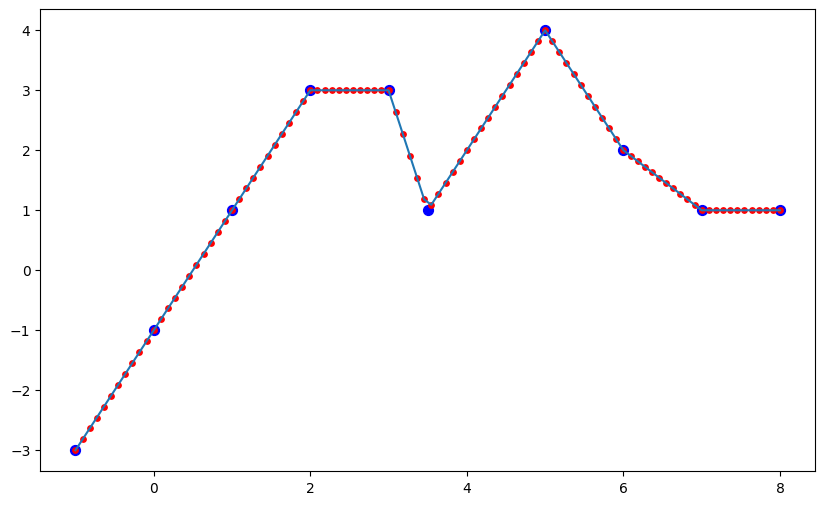

In [48]:
x = [-1,0,1,2,3,3.5,5,6,7,8]
y = [-3,-1,1,3,3,1,4,2,1,1]

g = interpolating_function(x,y)

x_new = np.linspace(min(x), max(x), 10*len(x))  
y_new = [g(xi) for xi in x_new]

plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50)
plt.plot(x_new, y_new)
plt.scatter(x_new, y_new , s=15, color='red')

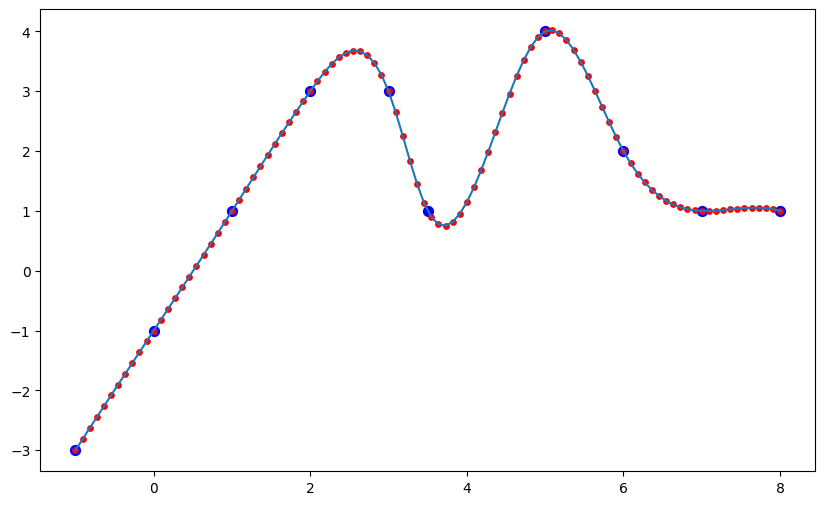

In [49]:
cs = CubicSpline(x, y)
y_new_cs= cs(x_new)

plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50)
plt.plot(x_new, y_new_cs)
plt.scatter(x_new, y_new_cs , s=15, color='red')

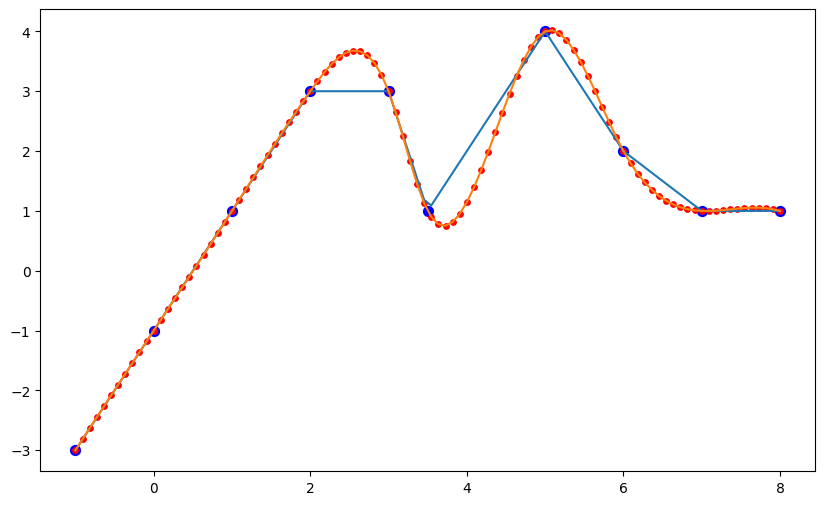

In [50]:
plt.figure(figsize=(10,6))

plt.scatter(x, y, color='blue',s=50)
plt.plot(x_new, y_new)
plt.plot(x_new, y_new_cs)
plt.scatter(x_new, y_new_cs , s=15, color='red')